In [10]:
from random import randint
import matplotlib.pyplot as plt
import random
import numpy as np


# Zad 1

## Trójkąt

In [11]:
x, y = [0], [0]


In [12]:
for n in range(10000):
    r = random.random()
    
    if r < 0.33:
        x[n] = (x[n] - 3) / 2
        y[n] = (y[n]) / 2
    elif r < 0.66:
        x[n] = (x[n] + 3) / 2
        y[n] = (y[n]) / 2
    else:
        x[n] = x[n] / 2
        y[n] = (y[n] + 3) / 2
    
    x.append(x[n])
    y.append(y[n])

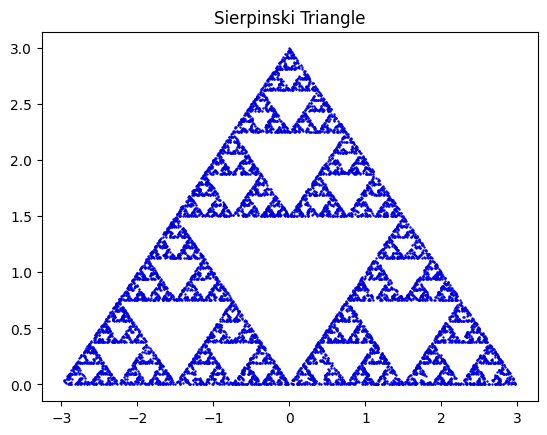

In [13]:
plt.title("Sierpinski Triangle")
plt.scatter(x, y, s=0.5, color='Blue')
plt.scatter(x, y, s=0.001, edgecolors='Black')

## Paprotka

In [14]:
x , y = [0], [0]

M = 100000

for n in range(M):
    r = random.random()
    
    if r < 0.02:
        x.append(x[n] * 0.001)
        y.append(0.16 * y[n])
    
    elif r < 0.81:
        x.append(0.85 * x[n] + 0.04 * y[n])
        y.append(-0.04 * x[n] + 0.85 * y[n] + 1.6)
    
    elif r < 0.91:
        x.append(0.20 * x[n] - 0.26 * y[n])
        y.append(0.23 * x[n] + 0.22 * y[n] + 1.6)
    
    elif r <= 1.0:
        x.append(-0.15 * x[n] + 0.28 * y[n])
        y.append(0.26 * x[n] + 0.24 * y[n] + 0.44)
    

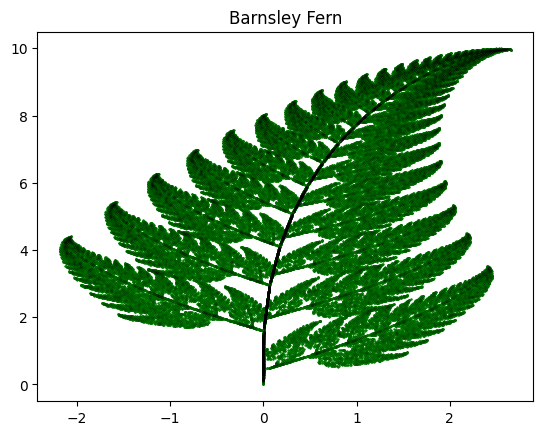

In [15]:
plt.title('Barnsley Fern')
plt.scatter(x, y, s=0.5, color='Green')
plt.scatter(x, y, s=0.001, edgecolors='Black')

# Zadanie 2

In [16]:
#M/4 points
x_short, y_short = [0], [0]

for n in range(int(M/4)):
    r = random.random()
    
    if r < 0.02:
        x_short.append(x_short[n] * 0.001)
        y_short.append(0.16 * y_short[n])
    
    elif r < 0.81:
        x_short.append(0.85 * x_short[n] + 0.04 * y_short[n])
        y_short.append(-0.04 * x_short[n] + 0.85 * y_short[n] + 1.6)
    
    elif r < 0.91:
        x_short.append(0.20 * x_short[n] - 0.26 * y_short[n])
        y_short.append(0.23 * x_short[n] + 0.22 * y_short[n] + 1.6)
    
    elif r <= 1.0:
        x_short.append(-0.15 * x_short[n] + 0.28 * y_short[n])
        y_short.append(0.26 * x_short[n] + 0.24 * y_short[n] + 0.44)


In [17]:
#limtis of fern
min_x, max_x = min(x), max(x)
min_y, max_y = min(y), max(y)

#grid (optionaly calculate max y and max x)
max_range = max(max_x - min_x, max_y - min_y)
grid_min_x, grid_max_x = min_x, min_x + max_range
grid_min_y, grid_max_y = min_y, min_y + max_range

#lists for resoults
log_list_M = []
log_list_M4 = []

In [18]:
for r in range(1,9):
    x_edges = np.linspace(grid_min_x, grid_max_x, (2**r) + 1)
    y_edges = np.linspace(grid_min_y, grid_max_y, (2**r) + 1)
    
    
    hist_M = np.histogram2d(x, y, bins=[x_edges, y_edges])[0]
    hist_M4 = np.histogram2d(x_short, y_short, bins=[x_edges, y_edges])[0]
    
    Nr_M = np.count_nonzero(hist_M)
    Nr_M4 = np.count_nonzero(hist_M4)
    
    log_list_M.append(np.log(Nr_M) if Nr_M > 0 else 0)
    log_list_M4.append(np.log(Nr_M4) if Nr_M4 > 0 else 0)

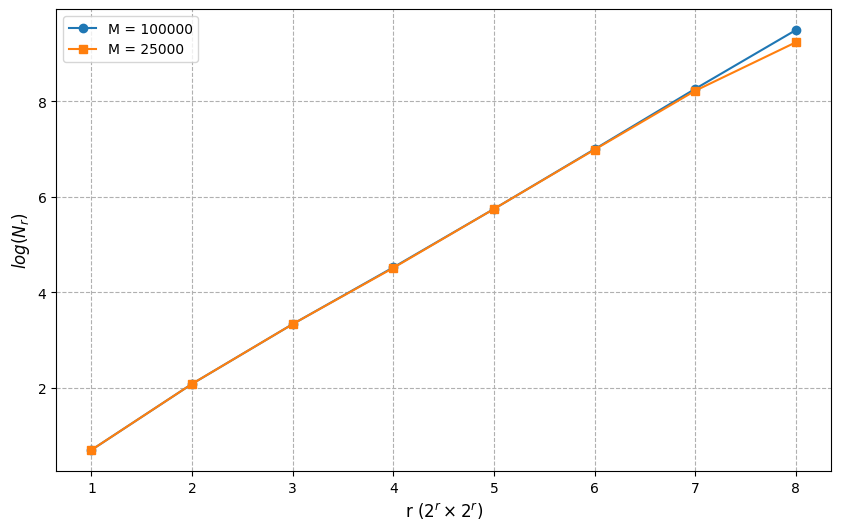

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,9), log_list_M, 'o-', label=f'M = {M}')
plt.plot(range(1,9), log_list_M4, 's-', label=f'M = {int(M/4)}')
plt.xlabel('r ($2^r \\times 2^r$)', fontsize=12)
plt.ylabel('$log(N_r)$', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')